In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read excel file
df = pd.read_excel("updated_mass_shootings.xlsx")

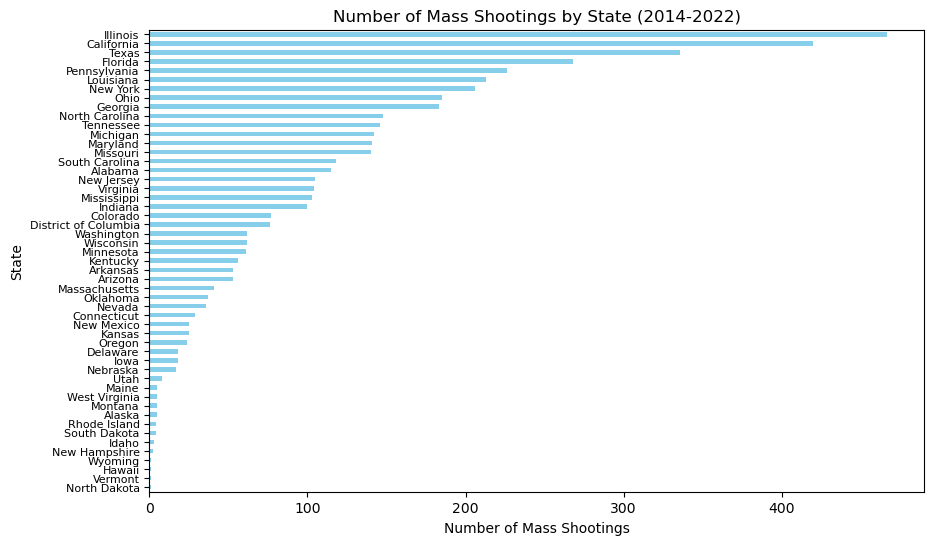

In [6]:
# Group data by state and count the occurrences
state_counts = df['State'].value_counts()

# Sort states by count
state_counts = state_counts.sort_values(ascending=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
state_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Mass Shootings')
plt.ylabel('State')
plt.title('Number of Mass Shootings by State (2014-2022)')
plt.yticks(fontsize=8)
plt.show()

In [27]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [28]:
# Encode state political party column
df['State Political Party'] = label_encoder.fit_transform(df['State Political Party'])

In [29]:
# Encode state column
df['State'] = label_encoder.fit_transform(df['State'])

In [30]:
# Encode president column
df['President'] = label_encoder.fit_transform(df['President'])

In [31]:
# Encode president column
df['Day of the Week'] = label_encoder.fit_transform(df['Day of the Week'])

In [32]:
# Encode president column
df['Month'] = label_encoder.fit_transform(df['Month'])

In [33]:
# Encode president political party column
df['President P.P.'] = label_encoder.fit_transform(df['President P.P.'])

In [42]:
# Encode city or country column
df['City Or County'] = label_encoder.fit_transform(df['City Or County'])

In [34]:
# Check the encoded labels for state political party column
print("Encoded labels for State Political Party column:")
print(df['State Political Party'].unique())

Encoded labels for State Political Party column:
[0 1]


In [35]:
# Check the encoded labels for day of the week column
print("Encoded labels for Day of the Week column:")
print(df['Day of the Week'].unique())

Encoded labels for Day of the Week column:
[6 0 3 2 1 5 4]


In [43]:
# Check the encoded labels for city or county column
print("Encoded labels for City Or County column:")
print(df['City Or County'].unique())

Encoded labels for City Or County column:
[699 691 320 ... 578 437 573]


In [36]:
# Check the encoded labels for month column
print("Encoded labels for Month column:")
print(df['Month'].unique())

Encoded labels for Month column:
[ 4  3  7  0  8  6  5  1 11 10  9  2]


In [37]:
# Check the encoded labels for state column
print("Encoded labels for State  column:")
print(df['State'].unique())

Encoded labels for State  column:
[46 32 38 24 13 18  0 22  4 36 44 30  9 33 47 43 14 28 40 35 10  2 21 42
  8  3  5 20 49 25 17 37 39  6 19 31 23  1 41 16 27 15 26  7 45 48 50 12
 29 11 34]


In [38]:
# Check the encoded labels for president p.p. column
print("Encoded labels for President P.P. column:")
print(df['President P.P.'].unique())

Encoded labels for President P.P. column:
[0 1]


In [39]:
# Check the encoded labels for president column
print("Encoded labels for President column:")
print(df['President'].unique())

Encoded labels for President column:
[0 1 2]


In [45]:
# Drop the address column
df = df.drop('Address', axis = 1)

In [46]:
# Compute the correlation matrix
correlation_matrix = df.corr()

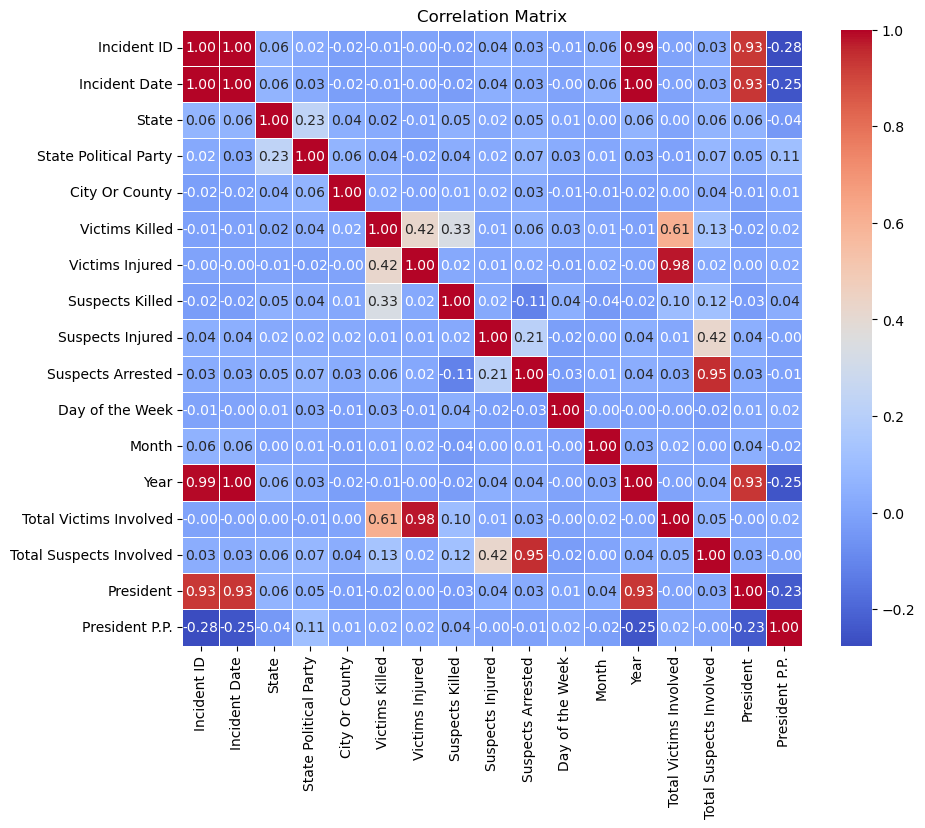

In [50]:
# Create a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [51]:
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix (Excluding 'Address' column):
                         Incident ID  Incident Date     State  \
Incident ID                 1.000000       0.997901  0.063541   
Incident Date               0.997901       1.000000  0.060733   
State                       0.063541       0.060733  1.000000   
State Political Party       0.022715       0.026245  0.232823   
City Or County             -0.019308      -0.019806  0.043138   
Victims Killed             -0.008115      -0.008487  0.024349   
Victims Injured            -0.003103      -0.002027 -0.005376   
Suspects Killed            -0.023205      -0.023097  0.049837   
Suspects Injured            0.041155       0.041144  0.021718   
Suspects Arrested           0.032055       0.033293  0.051355   
Day of the Week            -0.005219      -0.004327  0.010078   
Month                       0.057755       0.057039  0.000492   
Year                        0.993726       0.995788  0.058881   
Total Victims Involved     -0.004662     

In [58]:
# Convert 'Incident Date' column to timestamp
df['Incident Date'] = df['Incident Date'].astype(np.int64) // 10**9  # Convert to Unix timestamp

In [59]:
# Split data by target variable
X = df.drop(['State Political Party'], axis = 1)
y = df['State Political Party']

In [60]:
# Display the shape of X and y to verify split
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (4681, 16)
Shape of target variable (y): (4681,)


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [62]:
# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression(max_iter = 1000)
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test)

In [65]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49323843416370106


In [66]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       693
           1       0.00      0.00      0.00       712

    accuracy                           0.49      1405
   macro avg       0.25      0.50      0.33      1405
weighted avg       0.24      0.49      0.33      1405



/Users/danielsalazar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielsalazar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielsalazar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
